In [45]:
# Import required libraries
import tensorflow as tf # For model construction we'll use tensorflow and keras
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist # MNIST dataset
import numpy as np
import matplotlib.pyplot as plt # To plot
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix # Evaluation metrics
from sklearn.metrics import confusion_matrix

# Note: if you're working without a GPU and have issues installing tensorflow you can try:
# pip install tensorflow-cpu

In [46]:
# The dataset already comes splitted
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [47]:
# The datasets consists of 28x28 sized images for every digit with their respectiv layer
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Text(0.5, 1.0, 'Digit is 5')

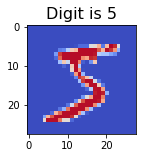

In [48]:
# Visualizing an example from the training set to see how the dataset looks

fig, ax = plt.subplots(1, figsize=(2,2))
ax.imshow(x_train[0], cmap='coolwarm') # First digit from the train set
ax.set_title(f'Digit is {y_train[0]}', fontsize=16) # Label is

In [49]:
# We transform the labels into categories taken into account the number of classes (10 digits)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [50]:
# We then normalize the features and reshape them so
#  the input is a 1D vector that takes values from 0 to 1

# Normalize the features
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the features
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [51]:
28*28

784

In [52]:
# We will then create a model using tensorflow's sequential method

model = keras.Sequential(
    [
        layers.Dense(input_shape=(28*28,), units=128, activation='relu'),
        layers.Dense(units=128, activation='relu'),
        layers.Dense(units=10, activation='softmax')
    ]
)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Traning the model
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 1s 7ms/step - loss: 0.5216 - accuracy: 0.8607
Epoch 2/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1986 - accuracy: 0.9422
Epoch 3/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1448 - accuracy: 0.9578
Epoch 4/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1159 - accuracy: 0.9664
Epoch 5/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0939 - accuracy: 0.9725
Epoch 6/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0808 - accuracy: 0.9764
Epoch 7/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0686 - accuracy: 0.9797
Epoch 8/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0580 - accuracy: 0.9833
Epoch 9/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0491 - accuracy: 0.9858
Epoch 10/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0428 - accuracy: 0.9876

In [58]:
# Predicting on the test set and turning it into a 1D vector
y_pred1 = model.predict(x_test)
y_pred = np.argmax(y_pred1, axis=1)

y_test = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


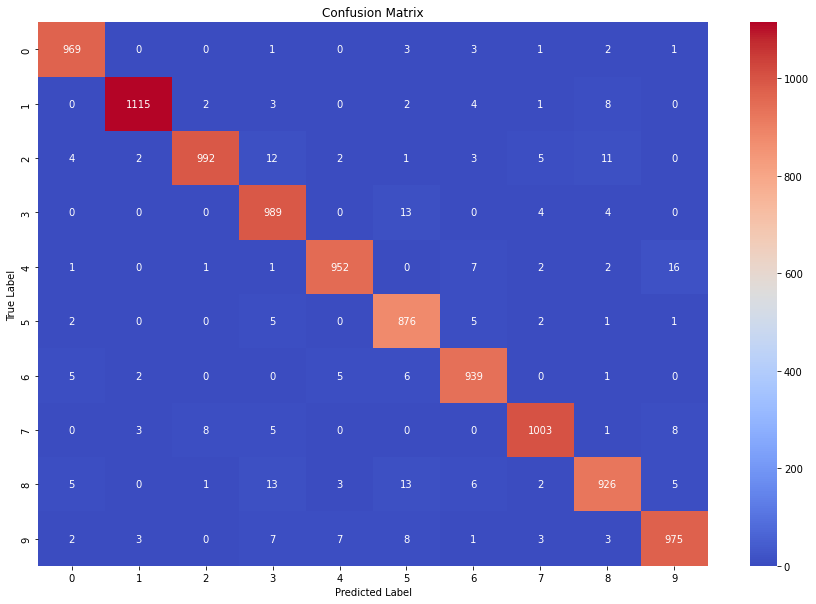

In [59]:
# First lets get an idea of how good our model is looking at its confusion matrix

confusion_mtx = confusion_matrix(y_test, y_pred)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='coolwarm')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

In [60]:
# Print f1, precision, and recall scores
precision = precision_score(y_test, y_pred , average="macro")
recall = recall_score(y_test, y_pred , average="macro")
f1_score = f1_score(y_test, y_pred , average="macro")
print(f'model precision is {round(precision, 3)}')
print(f'model recall is {round(recall, 3)}')
print(f'model f1 score is {round(f1_score, 3)}')

model precision is 0.973
model recall is 0.974
model f1 score is 0.973
